In [2]:
import pandas as pd
import numpy as np
# show max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from utils.exploration import *

In [3]:
df_raw = pd.read_csv('Data/cleaned_data1.csv')

In [4]:
df = df_raw.copy()

In [5]:
display(df.head(3), df.shape)

,Radiation recode,Survival months,Age,Marital Status,Sex_is_male,Race,Chemotherapy,Surgery,T,N,M,Grouped Stage,Tumor Size
0,0,8,70-74 years,Married,0,White,1,0,T2,N0,M1,IV,25
1,1,19,75-79 years,Married,0,Other,1,0,T1,N0,M0,I,30
2,0,22,80-84 years,Married,1,White,1,0,T1,N0,M0,I,20


(863, 13)

Mean of Survival months: 14.38
Median of Survival months: 9.00
Standard deviation of Survival months: 17.55
Mode of Survival months: 0
Number of outliers in Survival months: 54
Number of extreme outliers in Survival months: 21


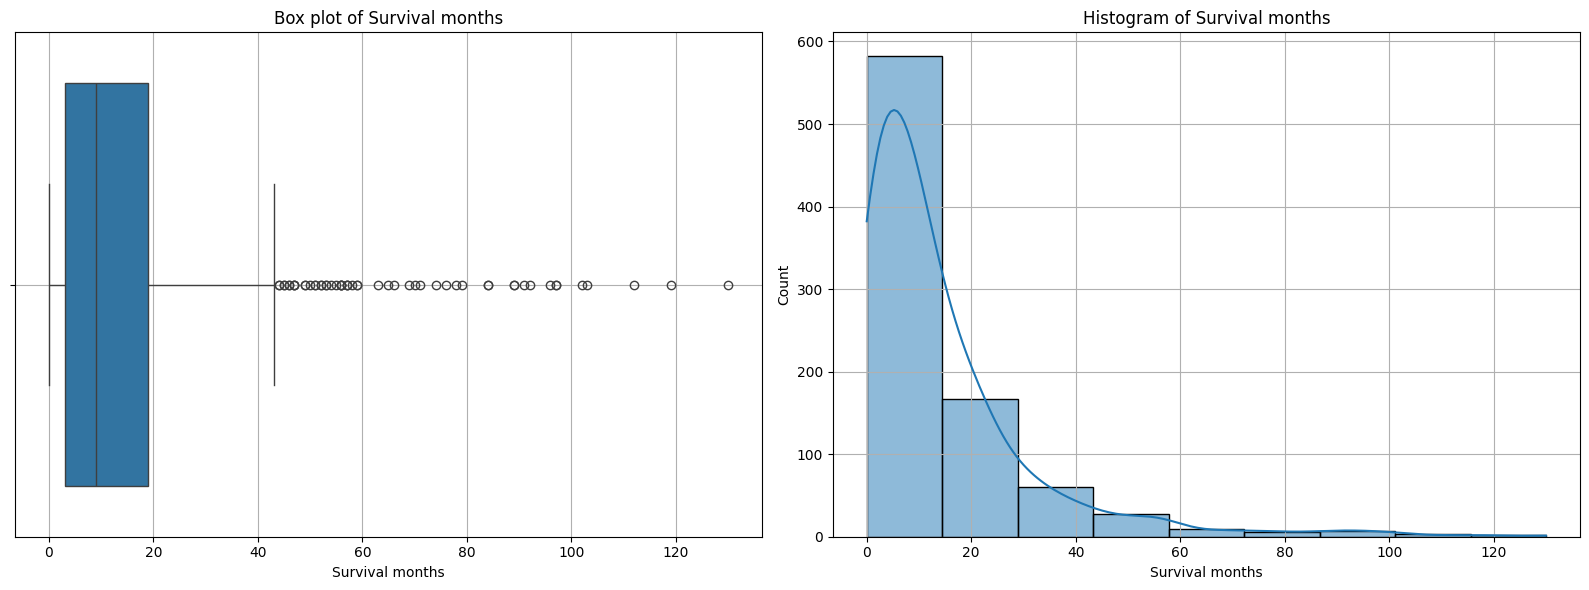

In [6]:
# check Survival Months distribution
data_exploration(df, 'Survival months')

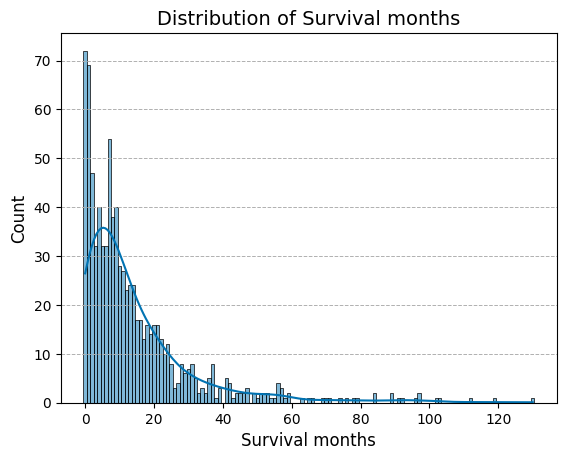

In [7]:
plt.style.use('seaborn-v0_8-colorblind')
palette = sns.color_palette("colorblind")  # This generates a colorblind-friendly palette
bar_color = palette[0]  # Using the first color in the palette

# Plotting the distribution of Survival Months in histogram
sns.histplot(df['Survival months'], kde=True, color=bar_color, bins=30, stat='count', discrete=True, linewidth=0.5, edgecolor='black')

# Add labels and title for clarity
plt.xlabel('Survival months', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Survival months', fontsize=14)

# Improve readability
plt.xticks(rotation=0, ha='center')  # Center-align x-axis labels to avoid overlap
plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Add gridlines for better readability

Mean of Tumor Size: 46.49
Median of Tumor Size: 40.00
Standard deviation of Tumor Size: 29.93
Mode of Tumor Size: 40
Number of outliers in Tumor Size: 27
Number of extreme outliers in Tumor Size: 2


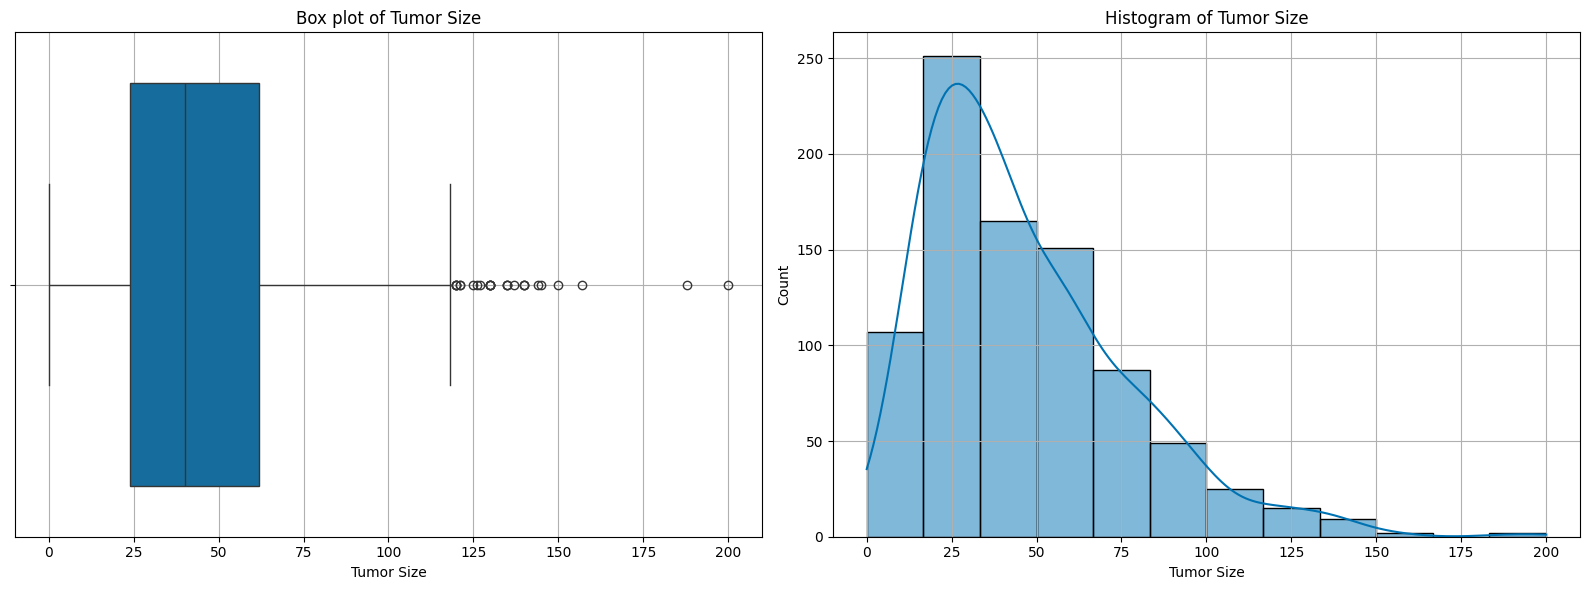

In [8]:
# check Tumor Size distribution
data_exploration(df, 'Tumor Size')

Counts and percentages of unique values in Survival Group:
                Count  Percentage
Survival Group                   
0                 447    51.79606
1                 416    48.20394


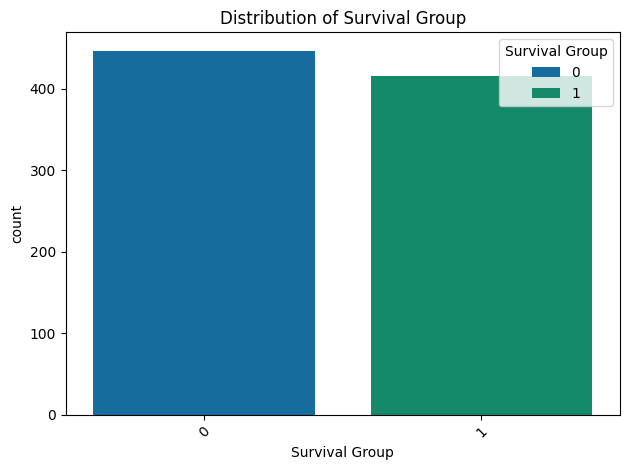

In [9]:
# make them two groups
df['Survival Group'] = df['Survival months'].apply(lambda x: 1 if x < 9 else 0) # we focus on the more severe group

data_exploration(df, 'Survival Group')

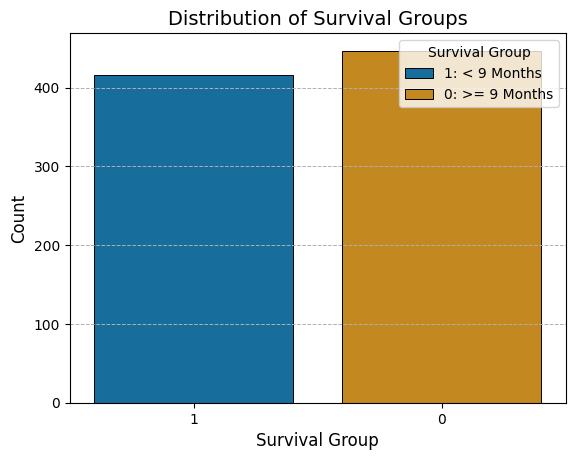

In [40]:
df_temp = df.copy()
df_temp['Survival Group']=df['Survival Group'].map({1: "1: < 9 Months", 0: "0: >= 9 Months"})

plt.style.use('seaborn-v0_8-colorblind')
palette = sns.color_palette("colorblind")  # This generates a colorblind-friendly palette
bar_color = palette[0]  # Using the first color in the palette
# Plotting the distribution of Survival Group
sns.countplot(data=df_temp, x='Survival Group', hue='Survival Group', palette=palette[0:2], edgecolor='black', legend=True, linewidth=0.7)
# Add labels and title for clarity
plt.xticks(ticks=["1: < 9 Months", "0: >= 9 Months"], labels=[1, 0])
plt.xlabel('Survival Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Survival Groups', fontsize=14)
# Improve readability
plt.xticks(rotation=0, ha='center')  
plt.grid(axis='y', linestyle='--', linewidth=0.7)  



In [11]:
# drop old columns
df = df.drop(['Survival months'], axis=1)

In [12]:
# a loop to convert all object columns to category
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Radiation recode  863 non-null    int64   
 1   Age               863 non-null    category
 2   Marital Status    863 non-null    category
 3   Sex_is_male       863 non-null    int64   
 4   Race              863 non-null    category
 5   Chemotherapy      863 non-null    int64   
 6   Surgery           863 non-null    int64   
 7   T                 863 non-null    category
 8   N                 863 non-null    category
 9   M                 863 non-null    category
 10  Grouped Stage     863 non-null    category
 11  Tumor Size        863 non-null    int64   
 12  Survival Group    863 non-null    int64   
dtypes: category(7), int64(6)
memory usage: 47.9 KB


In [14]:
# Function to summarize unique values if there are many
def summarize_unique_values(values):
    if len(values) > 5:  # Arbitrary threshold, adjust based on your preference
        return f"{len(values)} unique values"
    else:
        return list(values)

# Initialize an empty list to hold our summarized data
summary_data = []

# Iterate over each column to gather stats
for column in df.columns:
    unique_values = df[column].unique()
    counts = df[column].value_counts().to_dict()
    proportions = (df[column].value_counts(normalize=True) * 100).round(2).to_dict()
    
    # Summarize the unique values if there are too many
    unique_summary = summarize_unique_values(unique_values)
    
    # Append the summarized data
    summary_data.append({
        'Feature': column,
        'Unique Values Summary': unique_summary,
        'Counts Summary': counts,
        'Proportions (%)': proportions
    })

# Convert the summary data into a DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
summary_df

,Feature,Unique Values Summary,Counts Summary,Proportions (%)
0,Radiation recode,"[0, 1]","{0: 481, 1: 382}","{0: 55.74, 1: 44.26}"
1,Age,11 unique values,"{'65-69 years': 166, '70-74 years': 149, '75-7...","{'65-69 years': 19.24, '70-74 years': 17.27, '..."
2,Marital Status,"[Married, Single, Unknown/Other, Single (never...","{'Married': 483, 'Single': 234, 'Single (never...","{'Married': 55.97, 'Single': 27.11, 'Single (n..."
3,Sex_is_male,"[0, 1]","{1: 488, 0: 375}","{1: 56.55, 0: 43.45}"
4,Race,"[White, Other, Black]","{'White': 745, 'Black': 85, 'Other': 33}","{'White': 86.33, 'Black': 9.85, 'Other': 3.82}"
5,Chemotherapy,"[1, 0]","{1: 553, 0: 310}","{1: 64.08, 0: 35.92}"
6,Surgery,"[0, 1]","{0: 576, 1: 287}","{0: 66.74, 1: 33.26}"
7,T,6 unique values,"{'T2': 302, 'T4': 287, 'T1': 178, 'T3': 59, 'T...","{'T2': 34.99, 'T4': 33.26, 'T1': 20.63, 'T3': ..."
8,N,"[N0, N2, NX, N1, N3]","{'N2': 347, 'N0': 279, 'N3': 105, 'N1': 100, '...","{'N2': 40.21, 'N0': 32.33, 'N3': 12.17, 'N1': ..."
9,M,"[M1, M0, MX]","{'M0': 433, 'M1': 415, 'MX': 15}","{'M0': 50.17, 'M1': 48.09, 'MX': 1.74}"


Mean of Tumor Size: 46.49
Median of Tumor Size: 40.00
Standard deviation of Tumor Size: 29.93
Mode of Tumor Size: 40
Number of outliers in Tumor Size: 27
Number of extreme outliers in Tumor Size: 2


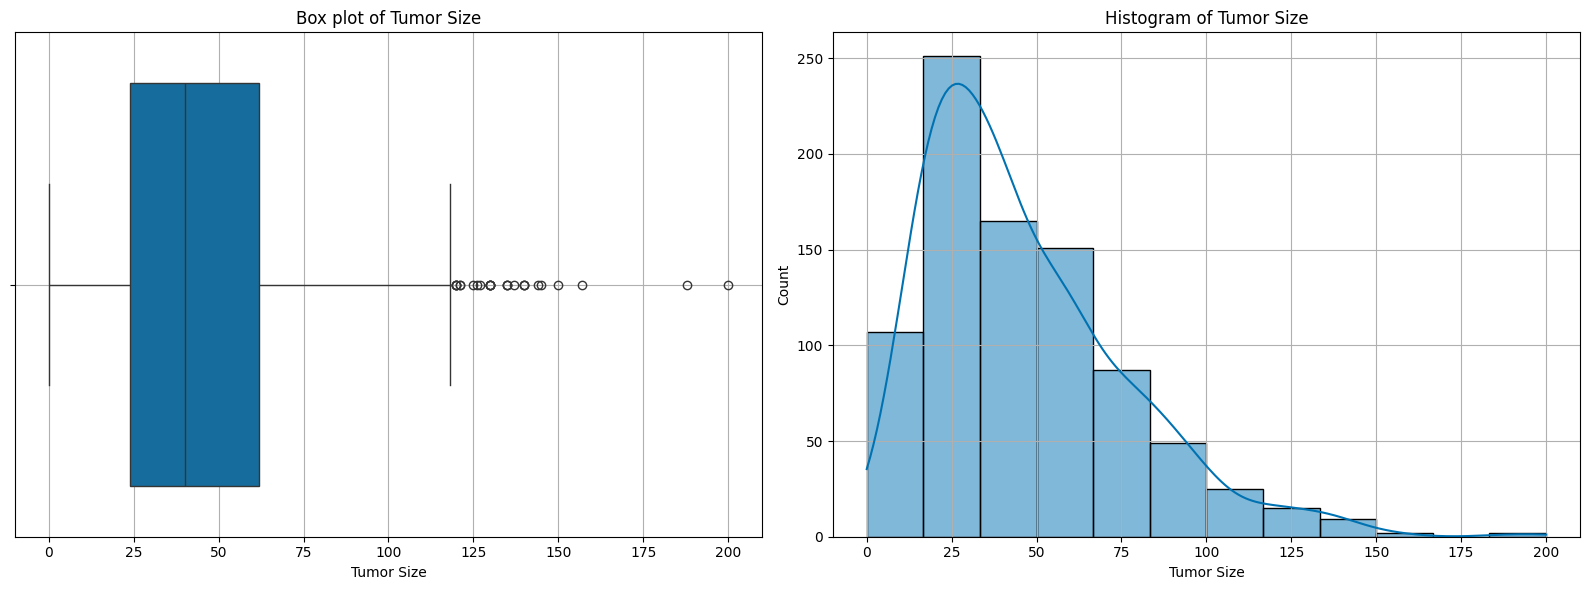

In [15]:
data_exploration(df, 'Tumor Size')

Counts and percentages of unique values in N:
    Count  Percentage
N                    
N2    347   40.208575
N0    279   32.329085
N3    105   12.166860
N1    100   11.587486
NX     32    3.707995


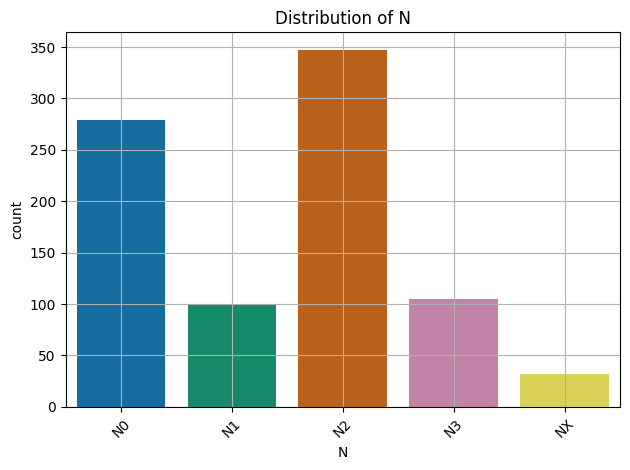

In [16]:
data_exploration(df, 'N')

In [17]:
# one hot encoding for all category columns
df = pd.get_dummies(df, drop_first=True,dtype='int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Radiation recode                       863 non-null    int64
 1   Sex_is_male                            863 non-null    int64
 2   Chemotherapy                           863 non-null    int64
 3   Surgery                                863 non-null    int64
 4   Tumor Size                             863 non-null    int64
 5   Survival Group                         863 non-null    int64
 6   Age_40-44 years                        863 non-null    int64
 7   Age_45-49 years                        863 non-null    int64
 8   Age_50-54 years                        863 non-null    int64
 9   Age_55-59 years                        863 non-null    int64
 10  Age_60-64 years                        863 non-null    int64
 11  Age_65-69 years                 

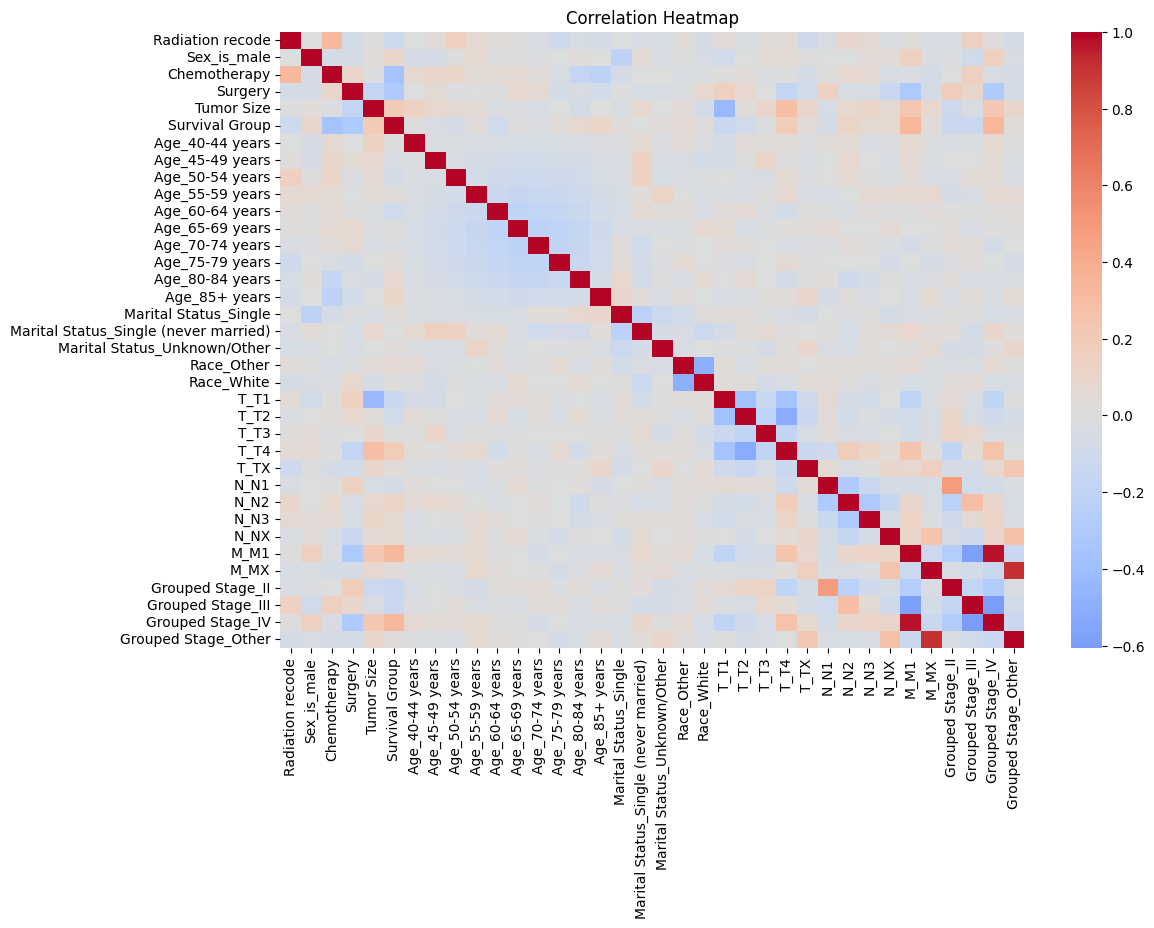

In [18]:
# check the heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# drop the Grouped Stage_IV and Grouped Stage_Other columns
df = df.drop(['Grouped Stage_IV', 'Grouped Stage_Other'], axis=1)

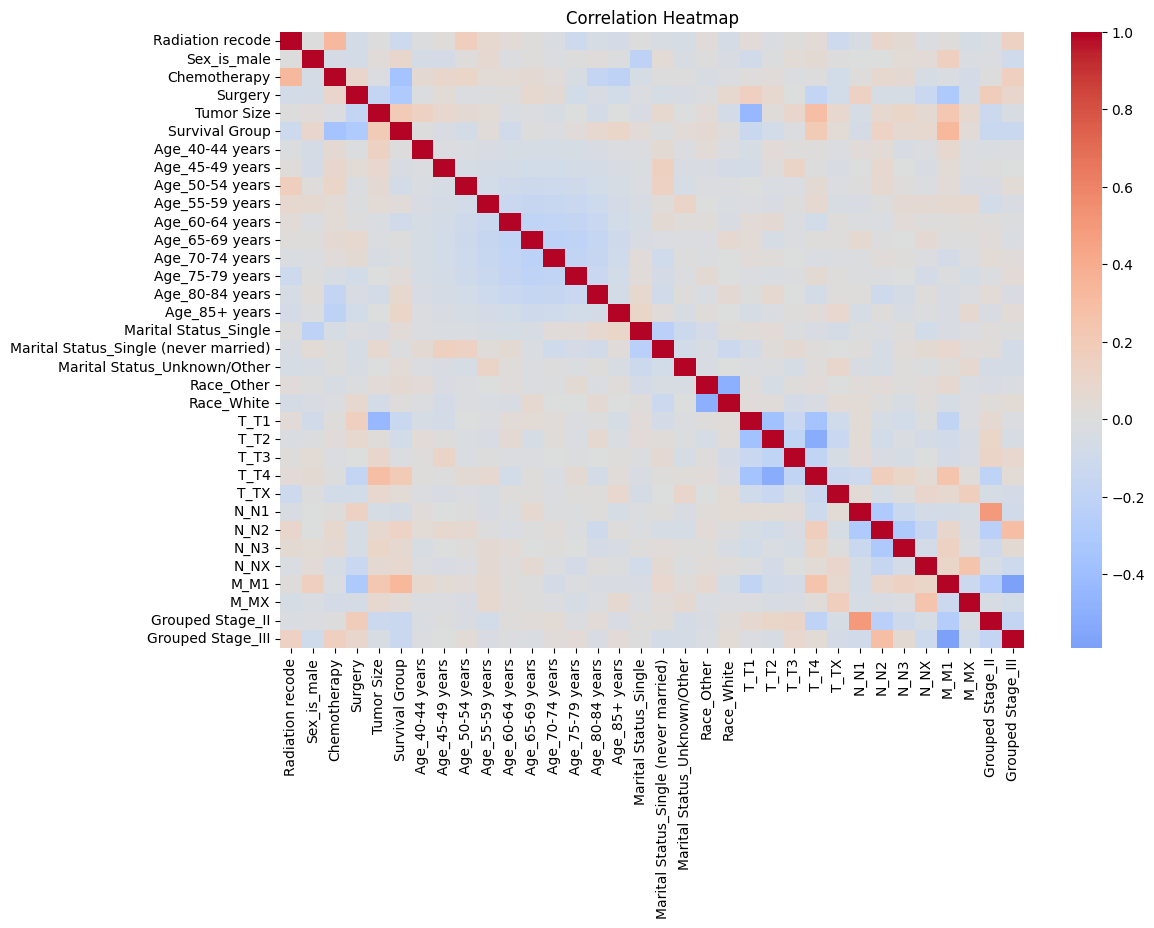

In [20]:
# check the heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Data Splitting

In [21]:
X = df.drop('Survival Group', axis=1)
y = df['Survival Group']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=66, stratify=y)


In [22]:
# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((604, 33), (259, 33), (604,), (259,))

In [17]:
X_train.head(3)

,Radiation recode,Sex_is_male,Chemotherapy,Surgery,Tumor Size,Age_40-44 years,Age_45-49 years,Age_50-54 years,Age_55-59 years,Age_60-64 years,Age_65-69 years,Age_70-74 years,Age_75-79 years,Age_80-84 years,Age_85+ years,Marital Status_Single,Marital Status_Single (never married),Marital Status_Unknown/Other,Race_Other,Race_White,T_T1,T_T2,T_T3,T_T4,T_TX,N_N1,N_N2,N_N3,N_NX,M_M1,M_MX,Grouped Stage_II,Grouped Stage_III
651,1,0,1,1,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1
482,1,1,1,1,15,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
791,1,1,1,0,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0


In [18]:
# save the train and test data
X_train.to_csv('Data1/X_train.csv', index=False)
X_test.to_csv('Data1/X_test.csv', index=False)
y_train.to_csv('Data1/y_train.csv', index=False)
y_test.to_csv('Data1/y_test.csv', index=False)

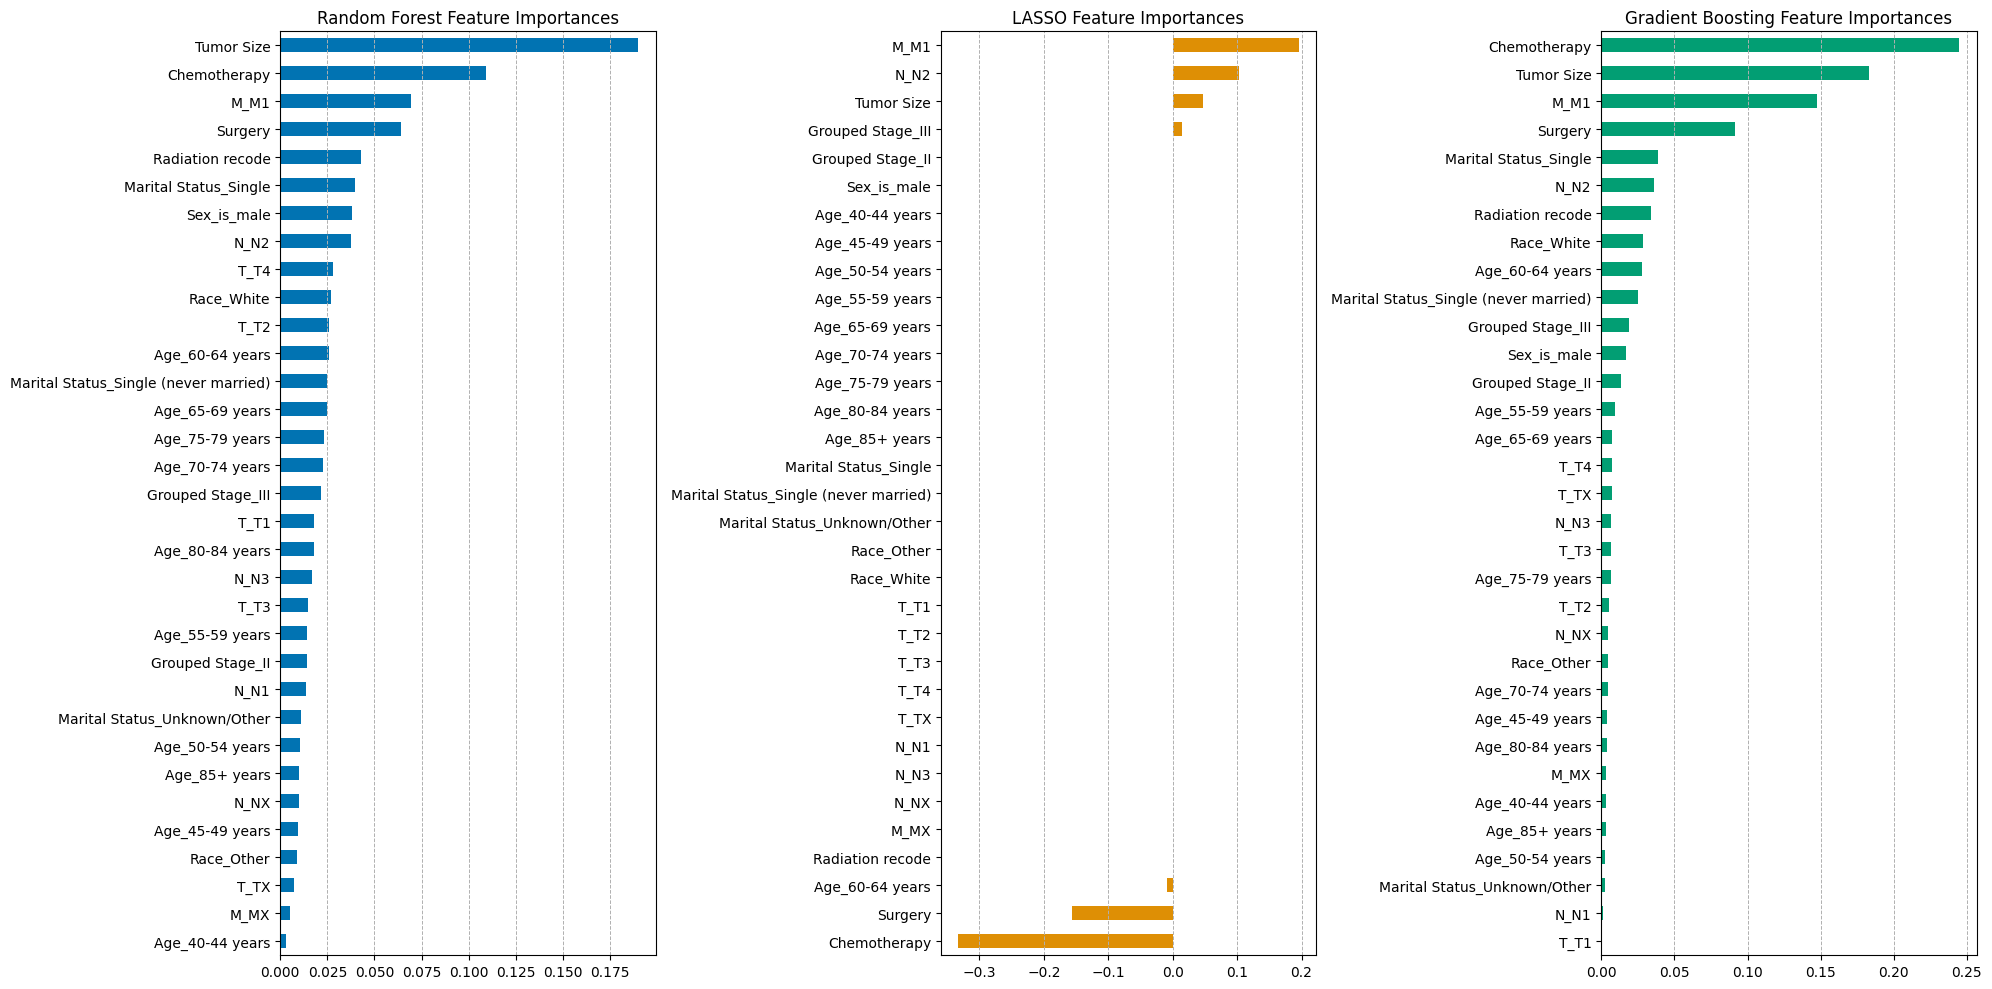

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-colorblind')
palette = sns.color_palette("colorblind")

# RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
feature_importances_rf = pd.Series(data=rf_clf.feature_importances_, index=X_train.columns)

# LassoCV
lasso = LassoCV(cv=5)  # Assuming a 5-fold cross-validation
X_train_ohe_std = X_train.copy()
# Standardize the 'Tumor Size' column
X_train_ohe_std['Tumor Size'] = (X_train['Tumor Size'] - X_train['Tumor Size'].mean()) / X_train['Tumor Size'].std()
lasso.fit(X_train_ohe_std, y_train)
feature_importances_lasso = pd.Series(data=lasso.coef_, index=X_train.columns)

# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
feature_importances_gb = pd.Series(data=gbc.feature_importances_, index=X_train.columns)

# Sorting feature importances
importances_sorted_rf = feature_importances_rf.sort_values()
importances_sorted_lasso = feature_importances_lasso.sort_values()
importances_sorted_gb = feature_importances_gb.sort_values()

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Plotting feature importances
importances_sorted_rf.plot(kind='barh', color=palette[0], ax=axs[0])
# Add gridlines for better readability
axs[0].grid(axis='x', linestyle='--', linewidth=0.7)
axs[0].set_title('Random Forest Feature Importances')

importances_sorted_lasso.plot(kind='barh', color=palette[1], ax=axs[1])
# Add gridlines for better readability
axs[1].grid(axis='x', linestyle='--', linewidth=0.7)
axs[1].set_title('LASSO Feature Importances')

importances_sorted_gb.plot(kind='barh', color=palette[2], ax=axs[2])
# Add gridlines for better readability
axs[2].grid(axis='x', linestyle='--', linewidth=0.7)
axs[2].set_title('Gradient Boosting Feature Importances')

# Adjust layout for better readability
plt.tight_layout()
plt.show()